In [77]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
ALGO = 'gp_mpc' # gp_mpc or rl/ppo or rl/sac
STUDY = 'hp_study_v1_cartpole'
STUDY_DIR = os.path.join(os.getcwd(), ALGO, STUDY)
HP_KINDS = os.listdir(STUDY_DIR)
PICKLE_NAME = 'metrics.pkl'
METRICS = ['average_return'] # average_return or exponentiated_avg_return


In [79]:
results = {}
for HP_KIND in HP_KINDS:
    RUNS = os.listdir(os.path.join(STUDY_DIR, HP_KIND))
    results[HP_KIND] = []
    for RUN in RUNS:
        result_path = os.path.join(STUDY_DIR, HP_KIND, RUN, PICKLE_NAME)
        try:
            with open(result_path, 'rb') as f:
                result = pickle.load(f)
                results[HP_KIND].append(result)
        except:
            pass


In [80]:
# put results into a pandas dataframe
df = pd.DataFrame()
index = 0
for HP_KIND in HP_KINDS:
    for result in results[HP_KIND]:
        index += 1
        df = pd.concat([df, pd.DataFrame(result, index=[index])], ignore_index=True)
        # df = df.append(result, ignore_index=True)
        # add HP_KIND column
        df.loc[df.index[-1], 'HP_KIND'] = HP_KIND


In [81]:
df

,average_length,length,average_return,exponentiated_avg_return,average_rmse,rmse,rmse_std,worst_case_rmse_at_0.5,failure_rate,average_constraint_violation,constraint_violation_std,constraint_violation,HP_KIND
0,150.0,150,-3.672152,145.235975,0.118051,0.118051,0.0,0.118051,0.0,0.0,0.0,0,default
1,150.0,150,-8.352999,141.891483,0.162992,0.162992,0.0,0.162992,0.0,0.0,0.0,0,default
2,150.0,150,-29.699364,133.830516,0.261612,0.261612,0.0,0.261612,0.0,0.0,0.0,0,default
3,150.0,150,-15.559763,138.256609,0.207899,0.207899,0.0,0.207899,0.0,0.0,0.0,0,default
4,150.0,150,-2.606635,146.940932,0.072228,0.072228,0.0,0.072228,0.0,0.0,0.0,0,default
5,150.0,150,-15.859797,138.849927,0.198728,0.198728,0.0,0.198728,0.0,0.0,0.0,0,default
6,150.0,150,-3.347906,146.410249,0.078187,0.078187,0.0,0.078187,0.0,0.0,0.0,0,default
7,150.0,150,-2.028078,147.397481,0.064196,0.064196,0.0,0.064196,0.0,0.0,0.0,0,default
8,150.0,150,-23.333477,135.328197,0.244517,0.244517,0.0,0.244517,0.0,0.0,0.0,0,default
9,150.0,150,-5.403386,144.439659,0.122512,0.122512,0.0,0.122512,0.0,0.0,0.0,0,default


In [82]:
df.groupby('HP_KIND')[METRICS[0]].describe()

,count,mean,std,min,25%,50%,75%,max
HP_KIND,,,,,,,,
default,20.0,-11.514514,11.362909,-37.976086,-20.823618,-5.821481,-2.542954,-0.267296
optimized,20.0,-12.517599,12.252343,-40.109655,-22.663916,-6.312095,-2.735102,-0.283985


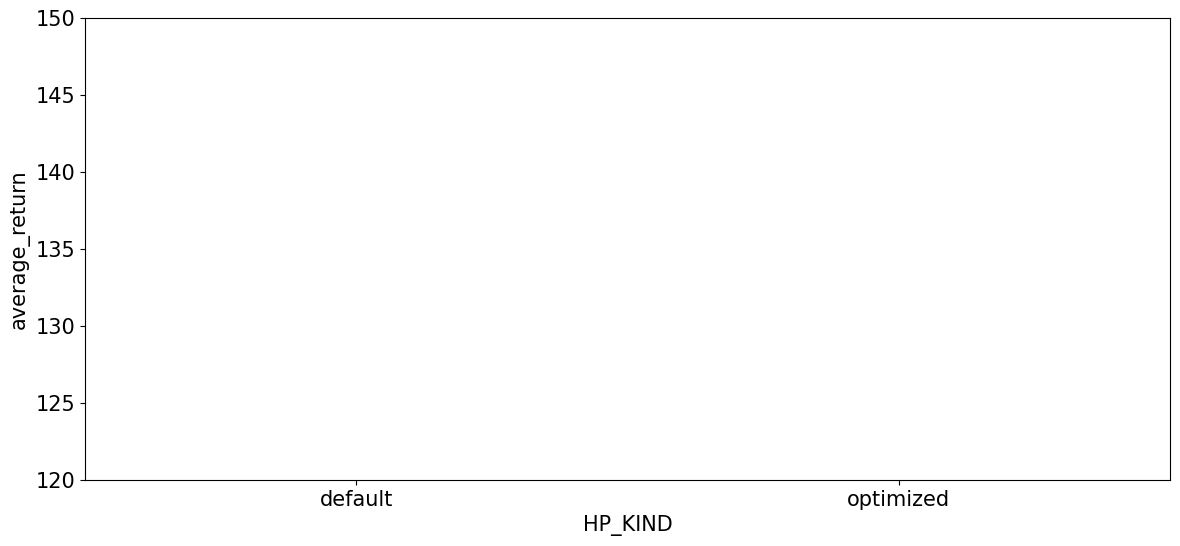

In [83]:
# plot boxen plot for each HP_KIND

plt.figure(figsize=(14, 6))
# plt.rcParams.update({'font.size': 15})
# change the order of the boxen plot
order=HP_KINDS
ax = sns.violinplot(x='HP_KIND', y=METRICS[0], data=df, inner='points', order=order)
# plt.setp(ax.get_xticklabels())
plt.ylabel(METRICS[0])
plt.ylim([120, 150])
plt.show()
plt.close()